In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold 

In [15]:
#Import the dataset
df = pd.read_csv('train.csv')

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Dummify columns with categorical values
def make_dummy_df(df, cols) :
    for x in cols:
        dums = pd.get_dummies(df[x], drop_first=True, prefix=x)
        df = pd.concat((df, dums), axis=1)
        df.drop([x], axis=1, inplace=True)
    return df

## Exploratory Data Analysis

mu = 180921.20, sigma = 79415.29


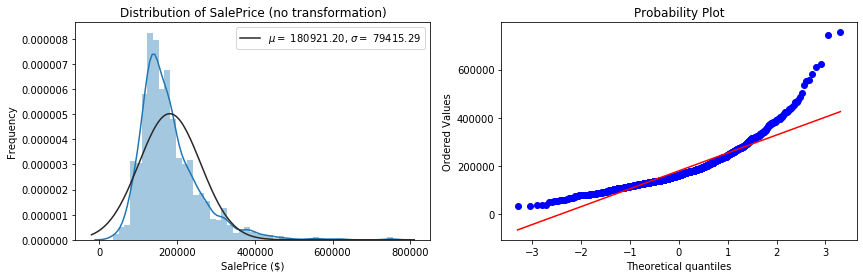

In [48]:
#Check distribution of SalePrice and QQ plot 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
sns.distplot(df['SalePrice'], fit=norm, ax = ax1)

#Find mean and standard deviation
(mu, sigma) = norm.fit(df['SalePrice'])
print('mu = {:.2f}, sigma = {:.2f}'.format(mu, sigma))

#Set labels and legend 
ax1.legend(['$\mu=$ {:.2f}, $\sigma=$ {:.2f}'.format(mu, sigma)],loc='best')
ax1.set_xlabel('SalePrice ($)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of SalePrice (no transformation)')

#QQ plot
ax2 = plt.subplot(122)
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

In [28]:
#Transform SalePrice using log 
y_log = np.log1p(df['SalePrice'])

mu = 180921.20, sigma = 79415.29


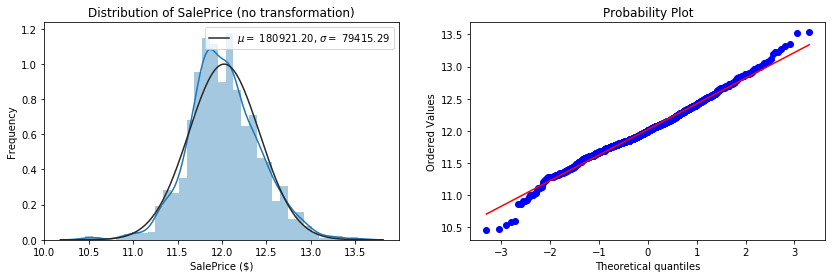

In [51]:
#Check distribution of log-transformed SalePrice
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
sns.distplot(y_log, fit=norm, ax = ax1)

#Find mean and standard deviation
(mu, sigma) = norm.fit(df['SalePrice'])
print('mu = {:.2f}, sigma = {:.2f}'.format(mu, sigma))

#Set labels and legend 
ax1.legend(['$\mu=$ {:.2f}, $\sigma=$ {:.2f}'.format(mu, sigma)],loc='best')
ax1.set_xlabel('SalePrice ($)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of SalePrice (no transformation)')

#QQ plot
ax2 = plt.subplot(122)
res = stats.probplot(y_log, plot=plt)
plt.show()

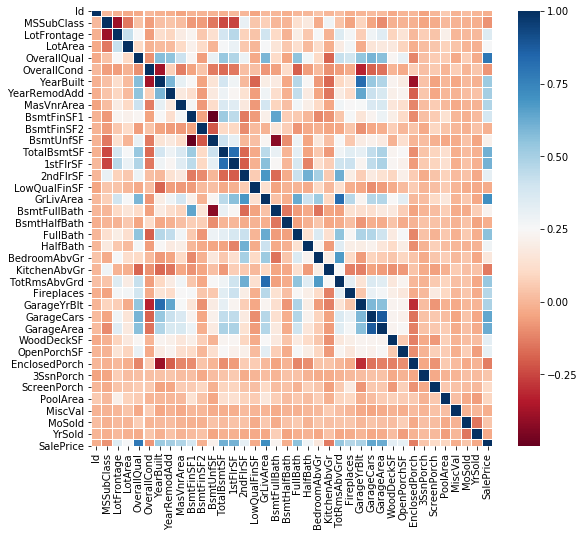

In [53]:
#Create a correlation heatmap 
corrmat = df.corr() 
colormap = plt.cm.RdBu
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap =colormap, linewidths = 0.1)

In [54]:
#Check which features have the highest correlation with each other
corr_features = corrmat.unstack()
corr_features[(abs(corr_features)>0.6) & (abs(corr_features) < 1)]

OverallQual   GarageCars      0.600671
              SalePrice       0.790982
YearBuilt     GarageYrBlt     0.825667
YearRemodAdd  GarageYrBlt     0.642277
BsmtFinSF1    BsmtFullBath    0.649212
TotalBsmtSF   1stFlrSF        0.819530
              SalePrice       0.613581
1stFlrSF      TotalBsmtSF     0.819530
              SalePrice       0.605852
2ndFlrSF      GrLivArea       0.687501
              HalfBath        0.609707
              TotRmsAbvGrd    0.616423
GrLivArea     2ndFlrSF        0.687501
              FullBath        0.630012
              TotRmsAbvGrd    0.825489
              SalePrice       0.708624
BsmtFullBath  BsmtFinSF1      0.649212
FullBath      GrLivArea       0.630012
HalfBath      2ndFlrSF        0.609707
BedroomAbvGr  TotRmsAbvGrd    0.676620
TotRmsAbvGrd  2ndFlrSF        0.616423
              GrLivArea       0.825489
              BedroomAbvGr    0.676620
GarageYrBlt   YearBuilt       0.825667
              YearRemodAdd    0.642277
GarageCars    OverallQual

In [58]:
#Create new features

#Combine bath variables into TotalBathrooms to check if correlation is higher with SalePrice
df['TotalBathrooms'] = df['FullBath'] + (df['HalfBath'] * 0.5) + df['BsmtFullBath'] + (df['BsmtHalfBath'] * 0.5)

#Combine porch variables except WoodenDeck to check if correlation is higher with SalePrice
df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

#Combine square footage above and below ground to give total square footage of the house
df['TotalSqrFeet'] = df['GrLivArea'] + df['TotalBsmtSF']

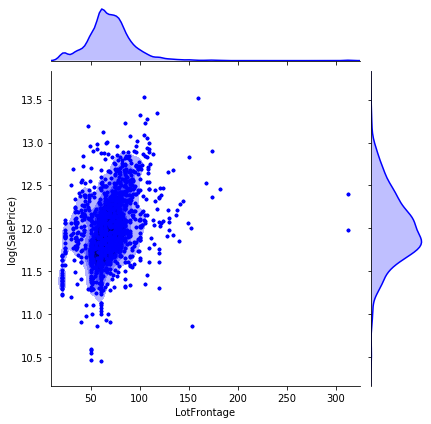

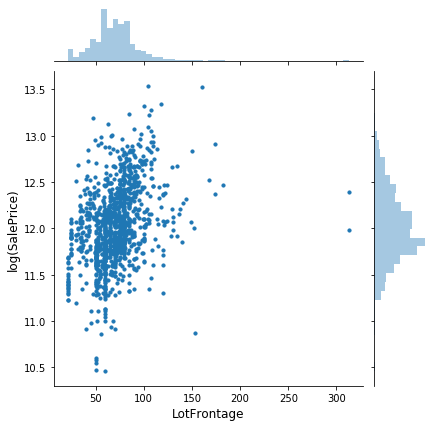

In [47]:
#Check which features in the dataset are skewed 
g1 = sns.jointplot(df['LotFrontage'], y_log, data=df, kind="kde", color="b")
g1.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker=".")
g1.ax_joint.collections[0].set_alpha(0)
g1.set_axis_labels("LotFrontage", "log(SalePrice)")

g2 = sns.jointplot(df['LotFrontage'],y_log, s = 10)
g1.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker=".")
g2.set_axis_labels('LotFrontage', 'log(SalePrice)', fontsize=12)

In [ ]:
#Train, test, split the data and then save the resulting files to a csv file
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state = 4)
X_train.to_csv('data/X_train.csv')
y_train.to_csv('data/y_train.csv')
X_test.to_csv('data/X_test.csv')
y_test.to_csv('data/y_test.csv')

In [36]:
#K-Fold with 5 splits set to an arbitrary random state
kf = KFold(n_splits = 5, shuffle = True, random_state = 4)

In [35]:
#Stratifiefd K-Fold with 10 splits set to an arbitrary random state
str_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=4)

In [38]:
#Create a function to return RMSE for each inputed model after performing K-Fold CV
def kf_rmse(model):
    kf = KFold(n_splits = 5, shuffle=True, random_state=4).get_n_splits(X_train)
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf))
    return(rmse)

## Lasso Regression

In [ ]:
#Lasso model object and parameters
lasso = linear_model.Lasso(normalize=True)
lasso = lasso.set_params(random_state=4)

#Train the lasso model
lasso.fit(X_train, y_train)

In [ ]:
#First predictions using X_val set
lasso_pred = lasso.predict(X_val)   #Make sure to use validation set, NOT test set.  We will need to make 3 sets

In [ ]:
#Calculate the MSE and RMSE using y_val set
error = abs(np.expml(lasso_pred) - np.expml(y_val))
print('MSE :' mean_squared_error(y_val, lasso_pred)) 
print('RMSE :' np.sqrt(mean_squared_error(y_test, lasso_pred)))

In [ ]:
#Tune the hyperparameters for lasso 
alphas = 100**np.linspace(10,-2,1000)*0.5
param_grid_lasso = {"max_iter": [5, 10, 20], "alpha": alphas}
grid_search_lasso = ms.GridSearchCV(lasso, param_grid_lasso, scoring= 'neg_mean_squared_error', 
                                    cv= kf, n_jobs=-1, return_train_score = True)
grid_search_lasso.fit(X_val, y_val)

In [ ]:
#Get the best parameters from the tuning
grid_search_lasso.best_params_



In [ ]:
#Plot of the training vs. validation data
y_train_lasso = grid_lasso.predict(X_train)
y_val_lasso = grid_lasso.predict(X_val)

plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_lasso), np.expm1(y_train), marker="o", s=15, label = "Training")
plt.scatter(np.exmpl(y_val_lasso), np.exmpl(y_val), marker="o", s=15, label="Validation")
plt.title("Training vs. Validation Sets for Lasso", fontsize=20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000])
plt.show()

## Random Forest

In [ ]:
#Random forest object and parameters
rforest = RandomForestRegressor()
rforest.set_params(random_state=4)

#Train the random forest model
rforest.fit(X_train, y_train)

#R^2 value of initial training set

In [ ]:
#Tune the hyperparameters for random forest
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {'max_depth': [20, 25, 30],
             'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 3, 4],
             'min_samples_leaf': [1, 3, 5],
             'n_estimators': [500, 750, 1000, 1250, 1500]}

In [ ]:
#Use grid search on the random forest object 
grid_search_rforest = ms.GridSearchCV(rforest, param_grid, scoring = 'neg_mean_squared_error', cv=kf, 
                                      n_jobs=-1, return_train_score=True)

## Gradient Boost

In [ ]:
#Gradient boost object and parameters
gb = GradientBoostingRegressor()
gb.set_params(random_state=4)

#Train the gradient boost model
gb.fit(X_train, y_train)

#R^2 value of initial training set
print("R^2 : %.5f" gb.score(X_train, y_train))